In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import re

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import os
print(os.listdir("../input/houseprices/"))
# Any results you write to the current directory are saved as output.

['Predicting-House-Prices-In-Bengaluru-Train-Data.csv', 'Predicting-House-Prices-In-Bengaluru-Test-Data.csv']


In [2]:
df_train = pd.read_csv("../input/houseprices/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")
df_train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df_train.shape

(13320, 9)

In [4]:
df_train.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df_test = pd.read_csv("../input/houseprices/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")
#transpose
df_test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [6]:
# Analyse price

#descriptive statistics summary
df_train['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

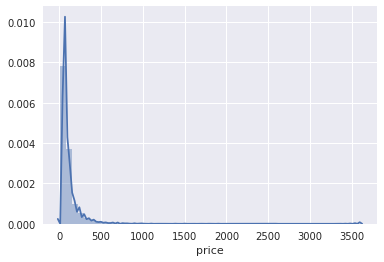

In [7]:
#histogram
sns.distplot(df_train['price']);

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 8.064469
Kurtosis: 108.166513


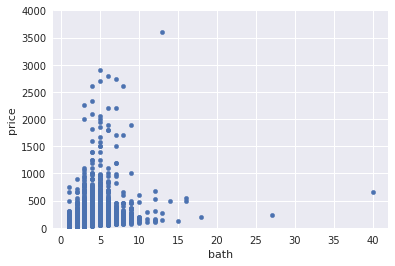

In [9]:
#scatter plot grlivarea/saleprice
var = 'bath'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,4000));

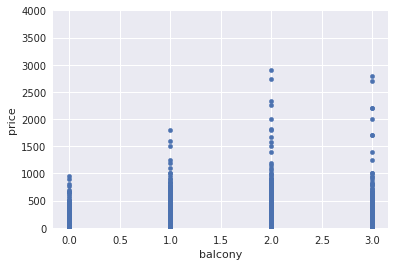

In [10]:
#scatter plot grlivarea/saleprice
var = 'balcony'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,4000));

In [11]:
df_train.total_sqft.dtype

dtype('O')

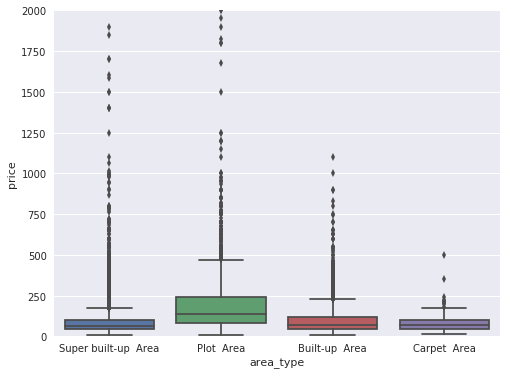

In [12]:
#box plot overallqual/saleprice
var = 'area_type'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=2000);

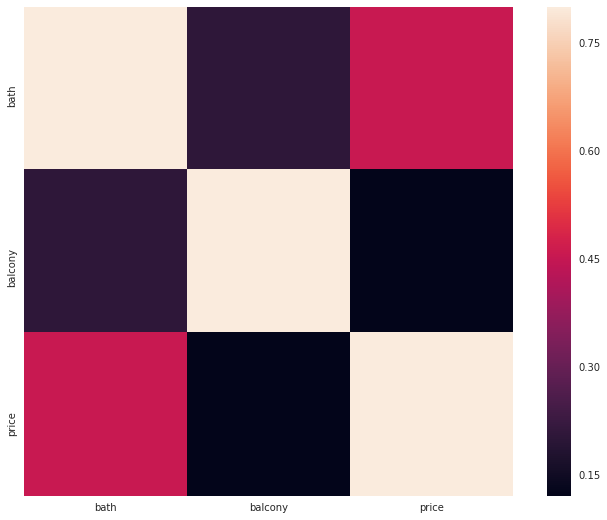

In [13]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
society,5502,0.413063
balcony,609,0.045721
bath,73,0.005480
size,16,0.001201
location,1,0.000075
price,0,0.000000
total_sqft,0,0.000000
availability,0,0.000000
area_type,0,0.000000


In [15]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.70194252]
 [-0.69898883]
 [-0.69522958]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68851664]
 [-0.68683841]]

outer range (high) of the distribution:
[[14.01281655]
 [14.34846342]
 [14.9526278 ]
 [16.69799156]
 [16.69799156]
 [17.36928531]
 [17.61095106]
 [18.04057906]
 [18.79242807]
 [23.41092909]]


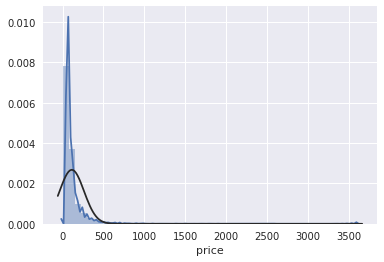

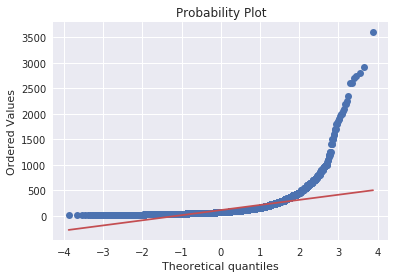

In [16]:
#histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [17]:
#applying log transformation
df_train['price'] = np.log(df_train['price'])

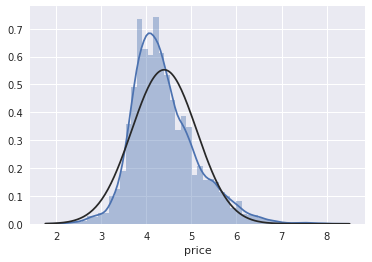

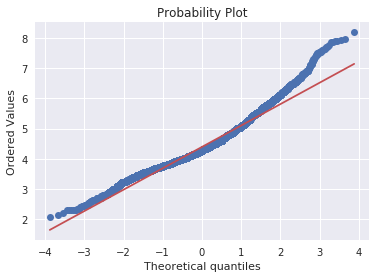

In [18]:
#transformed histogram and normal probability plot
sns.distplot(df_train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)

In [19]:
df_train['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [20]:
df_train['availability'].value_counts().head()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: availability, dtype: int64

In [21]:
df_train['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
Yelahanka                          213
Uttarahalli                        186
Hebbal                             177
Marathahalli                       175
Raja Rajeshwari Nagar              171
Bannerghatta Road                  152
Hennur Road                        152
7th Phase JP Nagar                 149
Haralur Road                       142
Electronic City Phase II           132
Rajaji Nagar                       107
Chandapura                         100
Bellandur                           96
KR Puram                            91
Hoodi                               88
Electronics City Phase 1            88
Yeshwanthpur                        85
Begur Road                          84
Sarjapur                            82
Kasavanhalli                        80
Harlur                   

In [22]:
df_train['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
43 Bedroom       1
27 BHK           1
13 BHK           1
14 BHK           1
18 Bedroom       1
19 BHK           1
12 Bedroom       1
16 BHK           1
Name: size, dtype: int64

In [23]:
df_train['total_sqft'].value_counts()

1200              843
1100              221
1500              205
2400              196
600               180
1000              172
1350              133
1050              123
1300              117
1250              114
900               112
1400              108
1800              104
1150              101
1600              101
1140               91
2000               83
1450               70
1650               69
800                67
1075               66
3000               66
1020               63
2500               62
1160               60
1125               60
1550               60
950                59
1180               58
1700               58
                 ... 
385 - 440           1
2928                1
1962                1
4239                1
2035                1
790                 1
1901                1
3410                1
2168                1
1248.52             1
840 - 1010          1
1482 - 1684         1
3381                1
4075                1
52272     

In [24]:
df_train = df_train.drop_duplicates()

In [25]:
df_train = df_train.drop('society', axis=1)
df_test = df_test.drop('society', axis=1)

In [26]:
df_test = df_test.drop('price', axis=1)

In [27]:
df_train = df_train.dropna()

In [28]:
df_test = df_test.fillna(-1)

In [29]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [30]:
Y = df_train['price']
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (13665, 7)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [31]:
all_data['size'] = all_data['size'].astype('str')

In [32]:
all_data['size'].str.extract('([0-9]+\s[A-Z][a-z]+)', expand=True)

,0
0,NaN
1,4 Bedroom
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,4 Bedroom
9,NaN


In [33]:
all_data['size'].str.extract('([0-9]+\s[A-Z][A-Z]+)', expand=True)

,0
0,2 BHK
1,NaN
2,3 BHK
3,3 BHK
4,2 BHK
5,2 BHK
6,3 BHK
7,3 BHK
8,NaN
9,2 BHK


In [34]:
all_data.head(2)

,area_type,availability,balcony,bath,location,size,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,Electronic City Phase II,2 BHK,1056
1,Plot Area,Ready To Move,3.0,5.0,Chikka Tirupathi,4 Bedroom,2600


In [35]:
all_data['total_sqft'] = all_data['total_sqft'].str.extract('([0-9]+)', expand=True)

In [36]:
all_data.head()

,area_type,availability,balcony,bath,location,size,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,Electronic City Phase II,2 BHK,1056
1,Plot Area,Ready To Move,3.0,5.0,Chikka Tirupathi,4 Bedroom,2600
2,Built-up Area,Ready To Move,3.0,2.0,Uttarahalli,3 BHK,1440
3,Super built-up Area,Ready To Move,1.0,3.0,Lingadheeranahalli,3 BHK,1521
4,Super built-up Area,Ready To Move,1.0,2.0,Kothanur,2 BHK,1200


In [37]:
all_data['size_BHK'] = all_data['size']

In [38]:
all_data['size_bed'] = all_data['size']

In [39]:
all_data['size_BHK'] = all_data['size'].str.extract('([0-9]+\s[A-Z][A-Z]+)', expand=True)

In [40]:
all_data['size_bed'] = all_data['size'].str.extract('([0-9]+\s[A-Z][a-z]+)', expand=True)

In [41]:
all_data['size_BHK'] = all_data['size_BHK'].str.extract('([0-9]+)', expand=True)

In [42]:
all_data['size_bed'] = all_data['size_bed'].str.extract('([0-9]+)', expand=True)

In [43]:
all_data.head()

,area_type,availability,balcony,bath,location,size,total_sqft,size_BHK,size_bed
0,Super built-up Area,19-Dec,1.0,2.0,Electronic City Phase II,2 BHK,1056,2,NaN
1,Plot Area,Ready To Move,3.0,5.0,Chikka Tirupathi,4 Bedroom,2600,NaN,4
2,Built-up Area,Ready To Move,3.0,2.0,Uttarahalli,3 BHK,1440,3,NaN
3,Super built-up Area,Ready To Move,1.0,3.0,Lingadheeranahalli,3 BHK,1521,3,NaN
4,Super built-up Area,Ready To Move,1.0,2.0,Kothanur,2 BHK,1200,2,NaN


In [44]:
all_data['size_BHK'] = all_data['size_BHK'].fillna(0)

In [45]:
all_data['size_bed'] = all_data['size_bed'].fillna(0)

In [46]:
all_data.head(10)

,area_type,availability,balcony,bath,location,size,total_sqft,size_BHK,size_bed
0,Super built-up Area,19-Dec,1.0,2.0,Electronic City Phase II,2 BHK,1056,2,0
1,Plot Area,Ready To Move,3.0,5.0,Chikka Tirupathi,4 Bedroom,2600,0,4
2,Built-up Area,Ready To Move,3.0,2.0,Uttarahalli,3 BHK,1440,3,0
3,Super built-up Area,Ready To Move,1.0,3.0,Lingadheeranahalli,3 BHK,1521,3,0
4,Super built-up Area,Ready To Move,1.0,2.0,Kothanur,2 BHK,1200,2,0
5,Super built-up Area,Ready To Move,1.0,2.0,Whitefield,2 BHK,1170,2,0
6,Super built-up Area,Ready To Move,1.0,3.0,Marathahalli,3 BHK,1310,3,0
7,Super built-up Area,18-Feb,2.0,2.0,Whitefield,3 BHK,1800,3,0
8,Plot Area,Ready To Move,3.0,5.0,Whitefield,4 Bedroom,2785,0,4
9,Super built-up Area,Ready To Move,1.0,2.0,7th Phase JP Nagar,2 BHK,1000,2,0


In [47]:
all_data = all_data.drop('size', axis=1)

In [48]:
all_data.head()

,area_type,availability,balcony,bath,location,total_sqft,size_BHK,size_bed
0,Super built-up Area,19-Dec,1.0,2.0,Electronic City Phase II,1056,2,0
1,Plot Area,Ready To Move,3.0,5.0,Chikka Tirupathi,2600,0,4
2,Built-up Area,Ready To Move,3.0,2.0,Uttarahalli,1440,3,0
3,Super built-up Area,Ready To Move,1.0,3.0,Lingadheeranahalli,1521,3,0
4,Super built-up Area,Ready To Move,1.0,2.0,Kothanur,1200,2,0


In [49]:
all_data['area_type'] = all_data['area_type'].map({'Carpet  Area': 0, 'Plot  Area': 1, 'Built-up  Area': 2, 'Super built-up  Area': 3})

In [50]:
all_data.head()

,area_type,availability,balcony,bath,location,total_sqft,size_BHK,size_bed
0,3,19-Dec,1.0,2.0,Electronic City Phase II,1056,2,0
1,1,Ready To Move,3.0,5.0,Chikka Tirupathi,2600,0,4
2,2,Ready To Move,3.0,2.0,Uttarahalli,1440,3,0
3,3,Ready To Move,1.0,3.0,Lingadheeranahalli,1521,3,0
4,3,Ready To Move,1.0,2.0,Kothanur,1200,2,0


In [51]:
all_data['availability'].str.extract('([0-9]+-[A-Z][a-z]+)', expand=True)

,0
0,19-Dec
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,18-Feb
8,NaN
9,NaN


In [52]:
all_data['availability'] = all_data['availability'].replace(to_replace = ['([0-9]+-[A-Z][a-z]+)'],value = 'a',regex = True)

In [53]:
all_data['availability'] = all_data['availability'].map({'a': 0, 'Ready To Move': 1})

In [54]:
all_data.head()

,area_type,availability,balcony,bath,location,total_sqft,size_BHK,size_bed
0,3,0.0,1.0,2.0,Electronic City Phase II,1056,2,0
1,1,1.0,3.0,5.0,Chikka Tirupathi,2600,0,4
2,2,1.0,3.0,2.0,Uttarahalli,1440,3,0
3,3,1.0,1.0,3.0,Lingadheeranahalli,1521,3,0
4,3,1.0,1.0,2.0,Kothanur,1200,2,0


In [55]:
all_data = all_data.drop('location', axis=1)

In [56]:
all_data.head()

,area_type,availability,balcony,bath,total_sqft,size_BHK,size_bed
0,3,0.0,1.0,2.0,1056,2,0
1,1,1.0,3.0,5.0,2600,0,4
2,2,1.0,3.0,2.0,1440,3,0
3,3,1.0,1.0,3.0,1521,3,0
4,3,1.0,1.0,2.0,1200,2,0


In [57]:
all_data['bath'] = all_data['bath'].astype('int')
all_data['total_sqft'] = all_data['total_sqft'].astype('float')
all_data['size_BHK'] = all_data['size_BHK'].astype('int')
all_data['size_bed'] = all_data['size_bed'].astype('int')

In [58]:
all_data.head()

,area_type,availability,balcony,bath,total_sqft,size_BHK,size_bed
0,3,0.0,1.0,2,1056.0,2,0
1,1,1.0,3.0,5,2600.0,0,4
2,2,1.0,3.0,2,1440.0,3,0
3,3,1.0,1.0,3,1521.0,3,0
4,3,1.0,1.0,2,1200.0,2,0


In [59]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [60]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [61]:
# x_train, x_val, y_train, y_val = train_test_split(train,Y, test_size=0.2, random_state=18)
# lgb_train = lgb.Dataset(data=x_train, label=y_train)
# lgb_eval = lgb.Dataset(data=x_val, label=y_val)

In [62]:
# params = {'task': 'train', 'boosting_type': 'gbdt', 'metric': 'rmse', 
#           'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 5000, 'verbose': 0 ,
#           'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1, 
#           'min_split_gain':.01, 'min_child_weight':1}
# model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

In [63]:
# lgb.plot_importance(model, figsize=(12, 25));

# Base models

In [64]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [65]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [66]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [67]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [68]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [69]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [70]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.5078 (0.0293)



In [72]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.5078 (0.0294)



In [73]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.3509 (0.0103)



In [74]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3514 (0.0077)



In [75]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3836 (0.0112)



In [76]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [77]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.4256 (0.0189)



In [86]:
test = test.fillna(0)

In [88]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [90]:
averaged_models.fit(train.values, Y)
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(Y, stacked_train_pred))

0.40673890609876423


In [91]:
model_xgb.fit(train, Y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(Y, xgb_train_pred))

0.3215155371065921


In [92]:
model_lgb.fit(train, Y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(Y, lgb_train_pred))

0.38030190108539985


In [94]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(Y,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.37609581328207004


In [95]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [99]:
ensemble

array([ 58.97267221, 413.85552607, 193.2024866 , ...,  59.77808346,
        47.14342229,  59.49042421])

In [100]:
sub_lgb = pd.DataFrame()
sub_lgb['price'] = ensemble
sub_lgb['price'] = np.around(sub_lgb['price'],decimals=4)

In [101]:
sub_lgb.to_excel("baseline.xlsx", index=False)
sub_lgb.head()

,price
0,58.9727
1,413.8555
2,193.2025
3,72.3110
4,54.6313
